In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df=pd.read_csv("C:/Users/admin/Downloads/Telegram Desktop/train_tweets.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [74]:
#Removing all the special characters present in the tweets
import re
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",tweet.lower()).split())
df["Processed_tweets"]=df["tweet"].apply(process_tweet)

In [75]:
df

,id,label,tweet,Processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso conde...


In [76]:
#Dropping 'id' and 'tweet' column since they are of no use
df.drop(['id','tweet'],axis=1,inplace=True)
df

,label,Processed_tweets
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i can t use cause they ...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso conde...


In [77]:
#Checking data types of the elements in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
label               31962 non-null int64
Processed_tweets    31962 non-null object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["Processed_tweets"],df["label"],test_size=0.2,random_state=42)

In [79]:
#Converting tweets(string data type) into count vector matrix(numeric data type)
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
count_vect=CountVectorizer(stop_words="english")
transformer=TfidfTransformer()

In [80]:
X_train_counts=count_vect.fit_transform(X_train)
X_train_tfidf=transformer.fit_transform(X_train_counts)
print(X_train_counts.shape)
print(X_train_tfidf.shape)

(25569, 33735)
(25569, 33735)


In [81]:
X_test_counts=count_vect.transform(X_test)
X_test_tfidf=transformer.transform(X_test_counts)
print(X_test_counts.shape)
print(X_test_tfidf.shape)

(6393, 33735)
(6393, 33735)


In [82]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
L_reg=LogisticRegression()
L_reg.fit(X_train_tfidf,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
predLR=L_reg.predict(X_test_tfidf)
predLR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import confusion_matrix,f1_score
cm_LR=confusion_matrix(y_test,predLR)
cm_LR

array([[5925,   12],
       [ 318,  138]], dtype=int64)

In [85]:
from sklearn.metrics import accuracy_score
a_LR=accuracy_score(y_test,predLR)
print("Accuracy score of Logistic Regression:",a_LR)

Accuracy score of Logistic Regression: 0.9483810417644298


In [86]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
D_tree=DecisionTreeClassifier()
D_tree.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
predDT=D_tree.predict(X_test_tfidf)
predDT

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix,f1_score
cm_DT=confusion_matrix(y_test,predDT)
cm_DT

array([[5743,  194],
       [ 172,  284]], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
a_DT=accuracy_score(y_test,predDT)
print("Accuracy score of Decision Tree:",a_DT)

Accuracy score of Decision Tree: 0.9427498826841858


In [90]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(X_train_tfidf,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [91]:
predSVC=s_model.predict(X_test_tfidf)
predSVC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import confusion_matrix,f1_score
cm_SVC=confusion_matrix(y_test,predSVC)
cm_SVC

array([[5937,    0],
       [ 456,    0]], dtype=int64)

In [93]:
from sklearn.metrics import accuracy_score
a_SVC=accuracy_score(y_test,predSVC)
print("Accuracy score of Support Vector Machine:",a_SVC)

Accuracy score of Support Vector Machine: 0.9286719849835758


In [104]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier(n_estimators=200)
RF_classifier.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
predRF=RF_classifier.predict(X_test_tfidf)
predRF

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [106]:
from sklearn.metrics import confusion_matrix,f1_score
cm_RF=confusion_matrix(y_test,predRF)
cm_RF

array([[5904,   33],
       [ 215,  241]], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score
a_RF=accuracy_score(y_test,predRF)
print("Accuracy score of Random Forest:",a_RF)

Accuracy score of Random Forest: 0.9612075707805412


In [108]:
Tp,Fn,Fp,Tn=cm_RF[0][0],cm_RF[0][1],cm_RF[1][0],cm_RF[1][1]
precision=Tp/(Tp+Fp)
recall=Tp/(Tp+Fn)
f1score=2*(recall*precision)/(recall+precision)
print("Recall:",recall)
print("Precision:",precision)
print("F1_score:",f1score)

Recall: 0.9944416371905003
Precision: 0.964863539794084
F1_score: 0.9794293297942933


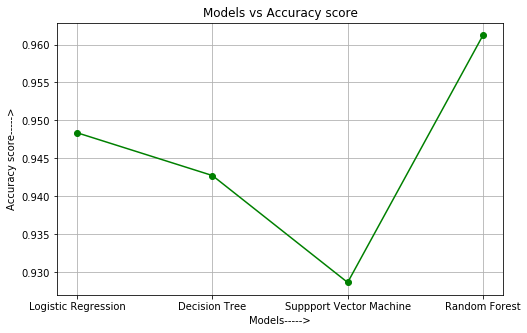

In [109]:
#Plotting scatter plot of accuracy score of different models (i.e. to compare accuracy score)
plt.figure(figsize=(8,5))
a_score=[a_LR,a_DT,a_SVC,a_RF]
m=['Logistic Regression','Decision Tree','Suppport Vector Machine','Random Forest']
plt.plot(m,a_score,'go',linestyle='solid')
plt.grid()
plt.xlabel("Models----->")
plt.ylabel("Accuracy score----->")
plt.title("Models vs Accuracy score")
plt.show()

In [110]:
print("Therefore, for the given data best accuracy score is shown by Random Forest Regression. Hence, it is the best model for this given data.")

Therefore, for the given data best accuracy score is shown by Random Forest Regression. Hence, it is the best model for this given data.
